Regression is a supervised machine learning technique that helps in predicting continuous numerical values or quantity. For Example temperature, price and so on.

A computer service centre records the data of time (in minutes) required in repairing a computer and number of faulty units.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data from input csv file into a Pandas DataFrame
computers = pd.read_csv("datasets/computers.csv") 

# Printing the first 5 rows
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0, 0.5, 'Minutes')

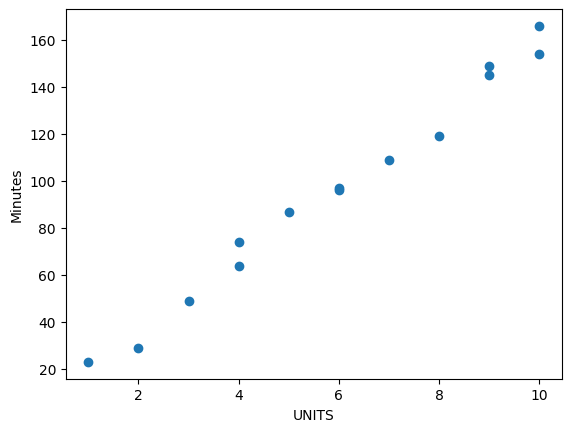

In [3]:
#plotting the graph

plt.scatter(computers['Units'],computers['Minutes'])

plt.xlabel("UNITS")
plt.ylabel("Minutes")


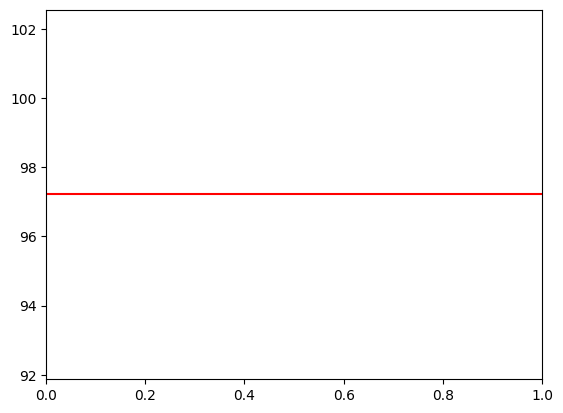

In [4]:
#found mean repair time

mean_repair_time =  computers['Minutes'].mean()
mean_repair_time

plt.axhline(y=mean_repair_time,c="r")

Text(0, 0.5, 'MINUTES')

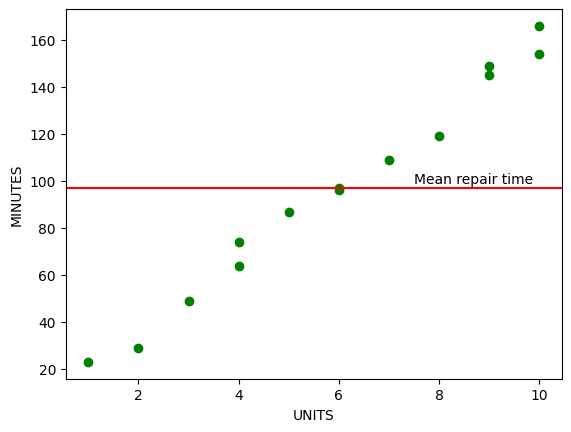

In [5]:
#complete graph with mean repair time

#calculate the mean
mean_repair_time =  computers['Minutes'].mean()


# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='green',marker='o')

# Plotting the mean
plt.axhline(mean_repair_time,c='r')

# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_repair_time+2))
plt.xlabel("UNITS")
plt.ylabel("MINUTES")




From the graph, it can be seen that, if 'mean' is used to predict the time taken to repair a computer, for some instances, a significant difference between the actual (observed) value and the predicted value of time is observed.

For example, the 2nd repair (index=2) took 29 minutes. If we use the mean to predict the time, we would have predicted the time as 97.21 minutes. Here the observed time is much lesser than the predicted time. On the other hand, consider the 13th repair. The observed time taken is 154 minutes which is larger than the predicted value by as much as 56.79 minutes. 

This indicates that to predict the expected time taken to repair a computer, we may have to consider other factors as well.

In [6]:
min_model1 = 10 + 12 * computers['Units']
min_model2 = 6 + 18 * computers['Units'] 
computers['min_model1'] = min_model1
computers['min_model2'] = min_model2
computers['min_model3'] = mean_repair_time
computers.head()



,Units,Minutes,min_model1,min_model2,min_model3
0,1,23,22,24,97.214286
1,2,29,34,42,97.214286
2,3,49,46,60,97.214286
3,4,64,58,78,97.214286
4,4,74,58,78,97.214286


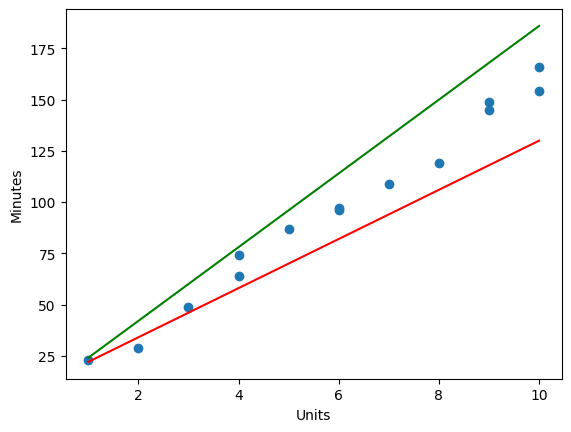

In [7]:
plt.scatter(computers['Units'], computers['Minutes'])
plt.plot(computers['Units'], computers['min_model1'], color='r')
plt.plot(computers['Units'], computers['min_model2'], color='g')
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

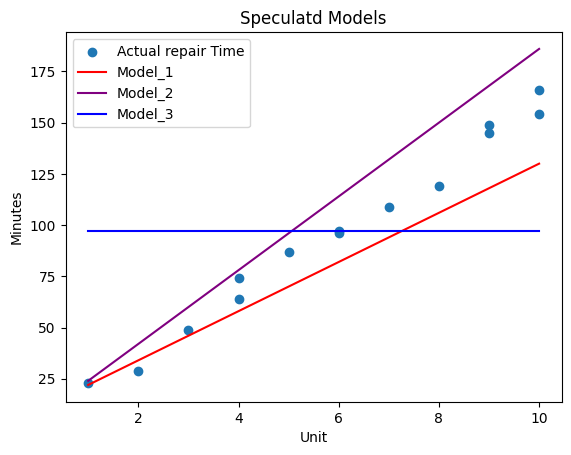

In [8]:
fig,ax=plt.subplots()

ax.scatter(x='Units',y='Minutes',data=computers,label='Actual repair Time')

ax.plot(computers['Units'],computers['min_model1'],color='red',label='Model_1')
ax.plot(computers['Units'],computers['min_model2'],color='purple',label='Model_2')
ax.plot(computers['Units'],computers['min_model3'],color='blue',label='Model_3')

ax.set_ylabel('Minutes')
ax.set_xlabel('Unit')
ax.set_title("Speculatd Models")
ax.legend()


In [9]:
model1_obs = pd.DataFrame({"Units":computers['Units'],
                           "Actual time": computers['Minutes'],
                           "Predicted time":computers['min_model1'],
                           "Error": (computers['min_model1']-computers['Minutes'])
                           })
model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [10]:
print(sum(model1_obs['Error']))

-213


In [11]:
print(sum(model1_obs['Error']**2))

4993


In [12]:
model2_obs = pd.DataFrame({"Units": computers['Units'],
    "Actual Time": computers["Minutes"],
    "Predicted Time": computers['min_model2'],
    "Error" : computers['min_model2'] - computers['Minutes']
})
model2_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [13]:
# SSE for Model1
sum(model2_obs.Error**2)


5001

In [14]:
model3_obs = pd.DataFrame({"Units": computers['Units'],
    "Actual Time": computers["Minutes"],
    "Predicted Time": computers['min_model3'],
    "Error" : computers['min_model3'] - computers['Minutes']
})
model3_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [15]:
print(sum(model3_obs.Error**2))

27768.35714285714


Finding the best fit model

In [16]:
x= computers.Units
y=computers.Minutes

xy=x*y
n= len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xy.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m= numerator/denominator
c= ymean -(m*xmean)
print('intercept:',c,'coefficient:',m)

intercept: 4.161654135338296 coefficient: 15.508771929824569


In [17]:
min_best_fit_model =  c+m*computers.Units 
computers['min_best_fit_model'] = min_best_fit_model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model')

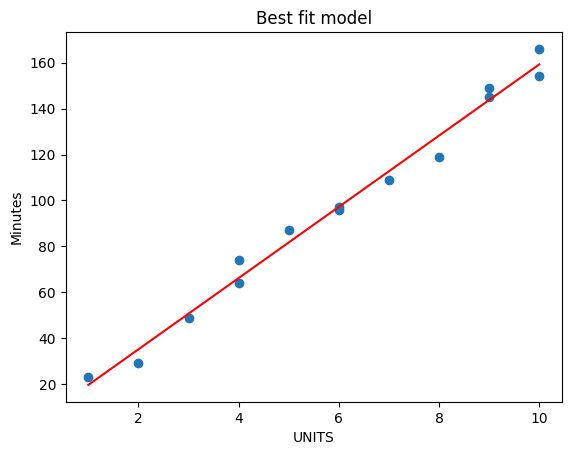

In [18]:
#plotting the graph
fig,ax=plt.subplots()

ax.scatter(x='Units',y='Minutes',data=computers,label='Actual repair Time')
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
plt.xlabel("UNITS")
plt.ylabel("Minutes")
ax.set_title("Best fit model")


In [19]:
model4_obs =pd.DataFrame ({
    "Units": computers['Units'],
    "Actual Time": computers['Minutes'],
    "Predicted Time": computers['min_best_fit_model'],
    "Error": computers['min_best_fit_model']-computers['Minutes']
})
model4_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [20]:
sum(model4_obs['Error']**2)

348.84837092731806

Linear Regression using Sklearn

In [21]:
X = computers[['Units']]
X

,Units
0,1
1,2
2,3
3,4
4,4
5,5
6,6
7,6
8,7
9,8


In [22]:
Y = computers[['Minutes']]
Y

,Minutes
0,23
1,29
2,49
3,64
4,74
5,87
6,96
7,97
8,109
9,119


In [ ]:


# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
model.fit(X,Y)


In [ ]:
# Test scikit-learn installation
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import LinearRegression

# If the above lines run without error, the installation is successful.
print("scikit-learn is installed correctly!")


In [ ]:
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)

In [ ]:

computers['Predicted_Minutes'] = model.predict(X)

In [ ]:
fig,ax= plt.subplots()
ax.scatter(x='Units',y='Minutes', data=computers)
ax.plot(computers.Units,computers.Predicted_Minutes,color='r')
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best Model line")

SST is the sum of squared differences between actual and mean target values

SSR is the sum of squared differences between predicted  and mean target values

In [ ]:
SST = sum((computers['Minutes'] - computers['Minutes'].mean())**2)
SST


In [ ]:
SSR= sum((computers.Predicted_Minutes - computers.Minutes.mean())**2)
SSR

SST can also be expressed in terms of the sum of squared regression (SSR) and the sum of squared errors (SSE) as,

SST = SSR + SSE.  

In [ ]:
SSE = SST - SSR
SSE

In [ ]:
Rsq= SSR/SST
Rsq